## 4. Численное интегрирование. Светимость черного тела
Согласно *формуле Планка* спектральная плотность энергетической светимости 
абсолютно чёрного тела
равна
$$
\varphi(\lambda, T) =\frac{2 \pi h c^2}{\lambda^5 \left(e^{\frac{h c}{\lambda k T}} - 1\right)},
$$
где
$h = 6.6261 \times 10^{-34}$ (постоянная Планка, $\mbox{Вт}\cdot\mbox{с}^2$);
$k = 1.3806 \times 10^{-23}$ (постоянная Больцмана, Вт с/K);
$c = 2.9979 \times 10^{8}$   (скорость света, м/с);
$T = 5778$ (эффективная температура Солнца, К).
Формула Планка позволяет узнать, какую энергию излучает единица поверхности тела с эффективной температурой $T$
за единицу времени на каждой единице длины волны $\lambda$.
Для определения энергии, излучаемой телом в определенном диапазоне частот
$\lambda_1$, $\lambda_2$, необходио найти интеграл
$$
R(\lambda_1,\lambda_2,T) = \int_{\lambda_1}^{\lambda_2} \varphi(\lambda, T) d\lambda.
$$
Применим эти знания к Солнцу.
Нас не должно удивлять, что формулу для абсолютно черного тела мы
применяем к Солцну. Среди тел нашей системы Солнце всех лучше
удовлетворяет свойствам абсолютно черного тела.

Чтобы узнать полную энергетическую светимость Солнца надо умножить
$R(\lambda_1,\lambda_2,T)$ на площадь поверхности Солнца.
Пригодится его радиус: $R = 6.957\times 10^8$ (м)

 1. Постройте для Солнца график зависимости $\varphi(\lambda, T)$ от $\lambda$.

 2. С помощью численного интегрирования найдите светимость Солнца
на видимой области длин волн, т.\,е. для $\lambda$ в диапазоне от 
$\lambda_1 = 3.5\times 10^{-7}$ до $\lambda_2 = 7\times 10^{-7}$.

 3. Найдите также светимость Солнца для всех длин волн: от $0$ до $\infty$
(вам придется брать несобственный интеграл).

 4. Этот интеграл, оказывается, можно взять аналитически
и энергетическая светимость равна $R^* = \sigma T^4$,
где 
$$
\sigma = \frac{8\pi^5 k^4}{15 c^3 h^3}
$$
Это так называемый закон *Стефана–Больцмана*.
Константа $\sigma$ называется константой Стефана–Больцмана.
Чтобы узнать полную энергетическую светимость не забудьте $R^*$
умножить на площадь поверхности Солнца. Сравните полученный результат с результатом из предыдущего пункта.

 5. Найдите так называемую *солнечную постоянную* –
мощность солнечного излучения, падающего перпендикулярно на единичную площадку
на высоте верхней границы атмосферы Земли.
Вам пригодится расстояние от Солна до Земли: $149.6\times 10^9$ м

 6. Попробуйте найти вычисленные вами величины в литературе и сравните ваши значения с найденными.
 
 7. Сделайте выводы.

Для начала подключил нужные мне библиотеки.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

Дальше прописал нужные константы.

In [23]:
h = 6.6261e-34   # Постоянная Планка
c = 2.9979e8     # Скорость света
k = 1.3806e-23   # Постоянная Больцмана
T = 5778        # Температура Солнца
R = 6.957e8     # Радиус Солнца
sigma = 5.67032e-8    # Константа Стефана-Больцмана
distance = 149.6e9   # Расстояние от Солнца до Земли

### 1.Приступаю к построению графика.

Прописываю диапазон волн и количество точек на графике.

In [24]:
lambda_min1 = 0.1e-6    # Минимальная длина волны
lambda_max1 = 2.0e-6    # Максимальная длина волны
num_points = 1000      # Количество точек на графике

Создаю массив длин волн.

In [25]:
lambdas = np.linspace(lambda_min1, lambda_max1, num_points)

По формуле нахожу спектральную плотность энергии для каждой волны.

In [26]:
phi = (2*np.pi*h*c**2/lambdas**5) * (np.exp(h*c/(lambdas*k*T))-1)**-1

И с помощью подключенной библиотеки “matplotlib” строю график.

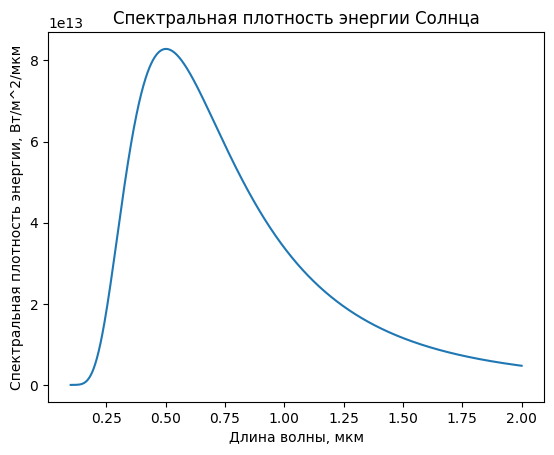

In [27]:
plt.plot(lambdas*1e6, phi)
plt.xlabel('Длина волны, мкм')
plt.ylabel('Спектральная плотность энергии, Вт/м^2/мкм')
plt.title('Спектральная плотность энергии Солнца')
plt.show()


### 2.Нахожу светимость Солнца на заданном диапазоне.

Для этого создаю сам диапазон.

In [28]:
lambda_min2 = 3.5e-7   # минимальная длина волны (в метрах)
lambda_max2 = 7.0e-7   # максимальная длина волны (в метрах)

Создаю функцию которая находить нужный нам интеграл.

In [29]:
def integrall(lambd):
    return (2 * np.pi * h * c**2 / lambd**5) * (np.exp(h * c / (lambd * k * T)) - 1)**-1

Вычисляем интеграл на видимой области длин волн.Умножаем результат на площадь поверхности Солнца.Выводим результ.

In [30]:
result1, error1 = spi.quad(integrall, lambda_min2, lambda_max2)
svet1 = result1 * 4 * np.pi * R**2
print("Светимость Солнца на видимой области длин волн: {:.2e} Вт".format(svet1))

Светимость Солнца на видимой области длин волн: 1.61e+26 Вт


### 3.Нахожу светимость Солнца для всех длин волн.

Вычисляем интеграл для всех длин волн.Умножаем результат на площадь поверхности Солнца.Выводим результат.

In [31]:
result2, error2 = spi.quad(integrall , 0, np.inf)
svet2 = result2 * 4 * np.pi * R**2
print("Светимость Солнца для всех длин волн: {:.2e} Вт".format(svet2))

<ipython-input-31-a64746a62e66>:1: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  result2, error2 = spi.quad(integrall , 0, np.inf)


Светимость Солнца для всех длин волн: 3.83e+26 Вт


### 4.Нахожу светимость Солнца по закону Стефана–Больцмана.

Вычисляю светимость солнца с помощью константы Больцмана и вывожу.

In [32]:
svet3 = sigma * T**4 * 4 * np.pi * R**2
print("Светимость Солнца по закону Стефана-Больцмана: {:.2e} Вт".format(svet3))

Светимость Солнца по закону Стефана-Больцмана: 3.84e+26 Вт


Можно заметить что результаты из предидущего пункта схожи.

### 5.Вычисляю солнечную постоянную.

Для этого я воспользовался светимостью Солнца из 3 пункта.После вывожу солнечную постоянную.

In [33]:
solar_constant = svet2 / (4*np.pi * distance**2)
print("Солнечная постоянная: {:.2f} Вт/м^2".format(solar_constant))

Солнечная постоянная: 1361.09 Вт/м^2


### 6.Сравниваю значения.

In [34]:
print("Светимость Солнца на видимой области длин волн: {:.2e} Вт".format(svet1))
print("Светимость Солнца для всех длин волн: {:.2e} Вт".format(svet2))
print("Светимость Солнца по закону Стефана-Больцмана: {:.2e} Вт".format(svet3))
print("Солнечная постоянная: {:.2f} Вт/м^2".format(solar_constant))

Светимость Солнца на видимой области длин волн: 1.61e+26 Вт
Светимость Солнца для всех длин волн: 3.83e+26 Вт
Светимость Солнца по закону Стефана-Больцмана: 3.84e+26 Вт
Солнечная постоянная: 1361.09 Вт/м^2


Литературные данные:
Светимость Солнца равна 3.827 *10^26 Вт.
Солнечная постоянная равна 1360+-0.5 Вт/м2.
Я сверил свои полученные данные с литературными и получил приблизительно похожие результаты.

### 7.Вывод.

Провел нужные вычисления, выполнил поставленные задачи, сверил полученные значения и убедился в правильности работы программы.
Могу заметить что результаты не полностью точны и это возмозможно связано с вычислениями чисел с плавающей запятой самим phython. Так как ему свойственно округлять большие числа с плавающей запятой для упрощения работы.
